In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

import tensorflow as tf

2023-07-05 19:56:20.047893: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 19:56:20.589425: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 19:56:20.592282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 19:56:30.413771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, Callback

In [17]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop


In [4]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_pickle('../pickle_pd/pd_top_25.pkl')

In [6]:
df.head()

,lep_pt_2,met_et,lep_pt_1,jet_n,lep_E_1,jet_pt_0,lep_eta_0,jet_pt_1,lep_pt_0,lep_E_2,...,jet_m,lep_E_0,jet_eta_1,jet_pt_2,lep_pt_3,jet_E_0,lep_charge_1,lep_charge_0,lep_E_3,label
0,8604.807617,34466.183594,36824.394531,0.0,37284.203125,0.000000,-0.665586,0.0,58844.101562,8606.623047,...,4666.577148,72366.562500,0.0,0.0,0.000000,0.000000,-1.0,1.0,0.000000,0
1,0.000000,13054.372070,32843.285156,0.0,33086.371094,0.000000,0.461765,0.0,50064.492188,0.000000,...,4666.577148,55497.660156,0.0,0.0,0.000000,0.000000,-1.0,1.0,0.000000,0
2,14819.154297,14494.322266,43711.828125,1.0,54970.597656,34171.484375,1.684675,0.0,45343.480469,27666.873047,...,5185.404785,126422.304688,0.0,0.0,10125.891602,78158.171875,-1.0,1.0,10297.296875,0
3,22682.914062,16763.203125,27512.105469,0.0,77148.039062,0.000000,-0.030784,0.0,28012.630859,30668.925781,...,5185.404785,28025.904297,0.0,0.0,13098.041992,0.000000,1.0,-1.0,14539.251953,0
4,0.000000,78260.984375,0.000000,1.0,0.000000,199608.000000,-0.026822,0.0,74441.789062,0.000000,...,23130.806641,74468.570312,0.0,0.0,0.000000,249863.078125,0.0,1.0,0.000000,0


In [7]:
y = df.pop('label')

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = tf.keras.utils.to_categorical(y_encoded)

# Shuffle and split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y_one_hot, test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(333251, 25)

In [14]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=25))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11,779
Trainable params: 11,779
Non-trainable params: 0
_________________________________________________________________


In [15]:
history2 = model.fit(X_train, y_train, batch_size=512, epochs=50, verbose=1, validation_data=(X_val, y_val))

Epoch 1/50
651/651 [==============================] - 3s 3ms/step - loss: 0.5501 - accuracy: 0.7645 - val_loss: 0.4678 - val_accuracy: 0.8040
Epoch 2/50
651/651 [==============================] - 2s 3ms/step - loss: 0.4525 - accuracy: 0.8101 - val_loss: 0.4342 - val_accuracy: 0.8214
Epoch 3/50
651/651 [==============================] - 2s 3ms/step - loss: 0.4261 - accuracy: 0.8251 - val_loss: 0.4149 - val_accuracy: 0.8292
Epoch 4/50
651/651 [==============================] - 2s 3ms/step - loss: 0.4092 - accuracy: 0.8342 - val_loss: 0.4021 - val_accuracy: 0.8385
Epoch 5/50
651/651 [==============================] - 2s 3ms/step - loss: 0.3979 - accuracy: 0.8407 - val_loss: 0.3960 - val_accuracy: 0.8415
Epoch 6/50
651/651 [==============================] - 2s 3ms/step - loss: 0.3898 - accuracy: 0.8438 - val_loss: 0.3878 - val_accuracy: 0.8452
Epoch 7/50
651/651 [==============================] - 2s 3ms/step - loss: 0.3831 - accuracy: 0.8464 - val_loss: 0.3810 - val_accuracy: 0.8494
Epoch 

In [12]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

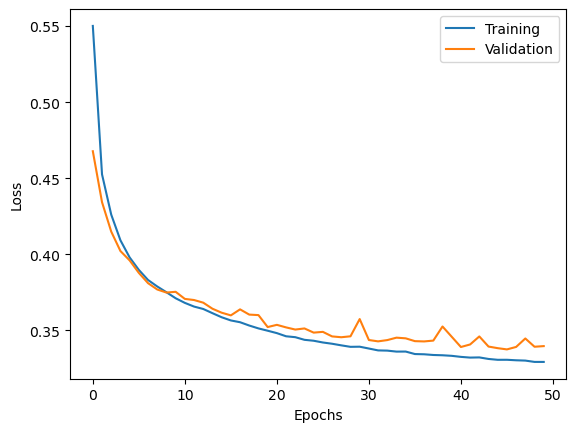

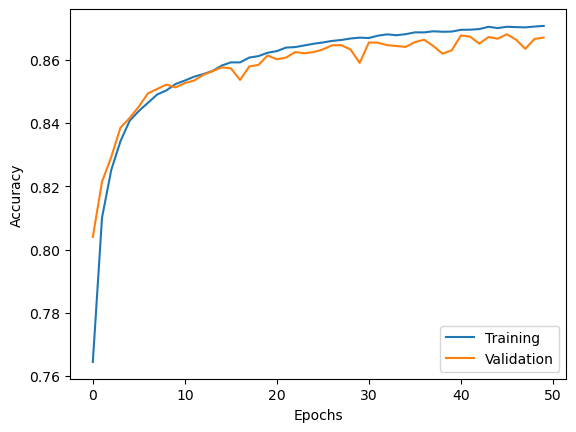

In [17]:
plot_history(history2)

In [18]:
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}


search_results = []

size_candidates = [
    64, 96, 128
]
activation_candidates = [
  'relu', 'sigmoid'
]
optimizer_candidates = [
  'adam', 'rmsprop'
]
dropout_candidates = [
  .3, .4, .5
]

for nb_activation in activation_candidates:
    for nb_optimizer in optimizer_candidates:
        for nb_size in size_candidates:

            print(f"Start training for (activation={nb_activation} - optimizer={nb_optimizer} - size={nb_size}")
    
          ########################################
          # Use your own model here!!
          ########################################
            model = Sequential([
            Dense(nb_size, activation=nb_activation, input_dim=25),
            Dense(3, activation='softmax')
            ])
            
            model.compile(loss='categorical_crossentropy', optimizer=nb_optimizer, metrics=['accuracy'])
            
            
          #model = Sequential([
          #  Conv2D(
          #      nb_filters, kernel_size=2, padding='valid',
          #      activation='relu', input_shape=x_train[0].shape
          #  ),
          #  Conv2D(
          #      int(nb_filters*2), kernel_size=2,
          #      padding='valid', activation='relu'
          #  ),
          #  MaxPooling2D(pool_size=2),
          #  Dropout(dropout),
          #  Flatten(),
          #  Dense(nb_dense, activation='relu'),
          #  Dropout(dropout),
          #  Dense(10, activation='softmax')
          #])
          #model.compile(
          #    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
          #)
          ########################################
    
          # we choose our best model as the one having the highest validation accuracy
            filepath = f"NN_train_results/cnn_paramsearch_filters_ac={nb_activation}_op={nb_optimizer}_si={nb_size}_dense=1.hdf5"
            checkpoint = ModelCheckpoint(
                filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max'
            )
    
          #batch_size=512, epochs=50, verbose=1, validation_data=(X_val, y_val)
        
            fit_results = model.fit(
              x=X_train,
              y=y_train,
              batch_size=512,
              # reduce number of epochs for speed reasons --> should be higher!
              epochs=50,
              validation_data=(X_val, y_val),
              callbacks=[checkpoint],
              verbose=0
            )
    
            # extract the best validation scores
            best_val_epoch    = np.argmax(fit_results.history['val_accuracy'])
            best_val_acc      = np.max(fit_results.history['val_accuracy'])
            best_val_acc_loss = fit_results.history['val_loss'][best_val_epoch]
      
            # get correct training accuracy
            best_model = load_model(filepath)
            best_val_acc_train_loss, best_val_acc_train_acc = best_model.evaluate(X_train, y_train)
      
            # store results
            search_results.append({
                'nb_activation': nb_activation,
                'nb_optimizer': nb_optimizer,
                #'dropout': dropout,
                'best_val_acc_train_acc': best_val_acc_train_acc,
                'best_val_acc': best_val_acc,
                'best_val_acc_train_loss': best_val_acc_train_loss,
                'best_val_acc_loss': best_val_acc_loss,
                'best_val_epoch': best_val_epoch
            })

Start training for (activation=relu - optimizer=adam - size=64
10415/10415 [==============================] - 21s 2ms/step - loss: 0.3677 - accuracy: 0.8555
Start training for (activation=relu - optimizer=adam - size=96
10415/10415 [==============================] - 15s 1ms/step - loss: 0.3650 - accuracy: 0.8564
Start training for (activation=relu - optimizer=adam - size=128
10415/10415 [==============================] - 13s 1ms/step - loss: 0.3558 - accuracy: 0.8599
Start training for (activation=relu - optimizer=rmsprop - size=64
10415/10415 [==============================] - 13s 1ms/step - loss: 0.3766 - accuracy: 0.8521
Start training for (activation=relu - optimizer=rmsprop - size=96
10415/10415 [==============================] - 12s 1ms/step - loss: 0.3636 - accuracy: 0.8576
Start training for (activation=relu - optimizer=rmsprop - size=128
10415/10415 [==============================] - 13s 1ms/step - loss: 0.3615 - accuracy: 0.8590
Start training for (activation=sigmoid - optimi

In [19]:
resultsDF = pd.DataFrame(search_results)

# sort values
resultsDF.sort_values('best_val_acc', ascending=False)

,nb_activation,nb_optimizer,best_val_acc_train_acc,best_val_acc,best_val_acc_train_loss,best_val_acc_loss,best_val_epoch
2,relu,adam,0.859910,0.857753,0.355811,0.360745,48
5,relu,rmsprop,0.859031,0.856409,0.361465,0.366885,47
4,relu,rmsprop,0.857630,0.856121,0.363621,0.368408,49
1,relu,adam,0.856406,0.854945,0.365049,0.369502,48
0,relu,adam,0.855544,0.852988,0.367678,0.372385,46
3,relu,rmsprop,0.852138,0.849867,0.376570,0.380225,47
8,sigmoid,adam,0.813795,0.812358,0.440311,0.442296,49
6,sigmoid,adam,0.811731,0.809742,0.445961,0.447394,49
7,sigmoid,adam,0.811169,0.809321,0.445524,0.447218,49
9,sigmoid,rmsprop,0.806038,0.804988,0.465949,0.467282,48


In [20]:
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}


search_results = []

size_candidates = [
    64, 96, 128
]
activation_candidates = [
  'relu', 'sigmoid'
]
optimizer_candidates = [
  'adam', 'rmsprop'
]
dropout_candidates = [
  .3, .4, .5
]

for nb_activation in activation_candidates:
    for nb_optimizer in optimizer_candidates:
        for nb_size in size_candidates:

            print(f"Start training for (activation={nb_activation} - optimizer={nb_optimizer} - size={nb_size}")
    
          ########################################
          # Use your own model here!!
          ########################################
            model = Sequential([
            Dense(nb_size, activation=nb_activation, input_dim=25),
            Dense(nb_size/2, activation=nb_activation),
            Dense(3, activation='softmax')
            ])
            
            model.compile(loss='categorical_crossentropy', optimizer=nb_optimizer, metrics=['accuracy'])
            
            
          #model = Sequential([
          #  Conv2D(
          #      nb_filters, kernel_size=2, padding='valid',
          #      activation='relu', input_shape=x_train[0].shape
          #  ),
          #  Conv2D(
          #      int(nb_filters*2), kernel_size=2,
          #      padding='valid', activation='relu'
          #  ),
          #  MaxPooling2D(pool_size=2),
          #  Dropout(dropout),
          #  Flatten(),
          #  Dense(nb_dense, activation='relu'),
          #  Dropout(dropout),
          #  Dense(10, activation='softmax')
          #])
          #model.compile(
          #    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
          #)
          ########################################
    
          # we choose our best model as the one having the highest validation accuracy
            filepath = f"NN_train_results/cnn_paramsearch_filters_ac={nb_activation}_op={nb_optimizer}_si={nb_size}_dense=2.hdf5"
            checkpoint = ModelCheckpoint(
                filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max'
            )
    
          #batch_size=512, epochs=50, verbose=1, validation_data=(X_val, y_val)
        
            fit_results = model.fit(
              x=X_train,
              y=y_train,
              batch_size=512,
              # reduce number of epochs for speed reasons --> should be higher!
              epochs=50,
              validation_data=(X_val, y_val),
              callbacks=[checkpoint],
              verbose=0
            )
    
            # extract the best validation scores
            best_val_epoch    = np.argmax(fit_results.history['val_accuracy'])
            best_val_acc      = np.max(fit_results.history['val_accuracy'])
            best_val_acc_loss = fit_results.history['val_loss'][best_val_epoch]
      
            # get correct training accuracy
            best_model = load_model(filepath)
            best_val_acc_train_loss, best_val_acc_train_acc = best_model.evaluate(X_train, y_train)
      
            # store results
            search_results.append({
                'nb_activation': nb_activation,
                'nb_optimizer': nb_optimizer,
                #'dropout': dropout,
                'best_val_acc_train_acc': best_val_acc_train_acc,
                'best_val_acc': best_val_acc,
                'best_val_acc_train_loss': best_val_acc_train_loss,
                'best_val_acc_loss': best_val_acc_loss,
                'best_val_epoch': best_val_epoch
            })

Start training for (activation=relu - optimizer=adam - size=64
10415/10415 [==============================] - 13s 1ms/step - loss: 0.3426 - accuracy: 0.8657
Start training for (activation=relu - optimizer=adam - size=96
10415/10415 [==============================] - 13s 1ms/step - loss: 0.3300 - accuracy: 0.8707
Start training for (activation=relu - optimizer=adam - size=128
10415/10415 [==============================] - 17s 2ms/step - loss: 0.3282 - accuracy: 0.8712
Start training for (activation=sigmoid - optimizer=adam - size=64
10415/10415 [==============================] - 15s 1ms/step - loss: 0.4454 - accuracy: 0.8108
Start training for (activation=sigmoid - optimizer=adam - size=96
10415/10415 [==============================] - 15s 1ms/step - loss: 0.4439 - accuracy: 0.8125
Start training for (activation=sigmoid - optimizer=adam - size=128
10415/10415 [==============================] - 15s 1ms/step - loss: 0.4433 - accuracy: 0.8117
Start training for (activation=sigmoid - optimi

In [21]:
resultsDF = pd.DataFrame(search_results)

# sort values
resultsDF.sort_values('best_val_acc', ascending=False)

,nb_activation,nb_optimizer,best_val_acc_train_acc,best_val_acc,best_val_acc_train_loss,best_val_acc_loss,best_val_epoch
5,relu,rmsprop,0.871223,0.867776,0.328223,0.339285,48
1,relu,adam,0.870680,0.867704,0.330008,0.337796,49
4,relu,rmsprop,0.870389,0.867680,0.330281,0.338986,49
2,relu,adam,0.871490,0.867404,0.327329,0.337014,41
0,relu,adam,0.865663,0.863947,0.342563,0.349678,48
3,relu,rmsprop,0.865816,0.863503,0.340826,0.348793,48
7,sigmoid,adam,0.812523,0.809778,0.443916,0.445641,49
8,sigmoid,adam,0.811704,0.809297,0.443273,0.445150,49
10,sigmoid,rmsprop,0.810881,0.809033,0.449673,0.451270,47
6,sigmoid,adam,0.810809,0.808673,0.445411,0.446909,48


In [24]:
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}


search_results = []

size_candidates = [
    64, 96, 128
]
activation_candidates = [
  'relu', 'sigmoid'
]
optimizer_candidates = [
  'adam', 'rmsprop'
]
dropout_candidates = [
  .3, .4, .5
]

for nb_activation in activation_candidates:
    for nb_optimizer in optimizer_candidates:
        for nb_size in size_candidates:

            print(f"Start training for (activation={nb_activation} - optimizer={nb_optimizer} - size={nb_size}")
    
          ########################################
          # Use your own model here!!
          ########################################
            model = Sequential([
            Dense(nb_size, activation=nb_activation, input_dim=25),
            Dense(nb_size/2, activation=nb_activation),
            Dense(nb_size/4, activation=nb_activation),
            Dense(3, activation='softmax')
            ])
            
            model.compile(loss='categorical_crossentropy', optimizer=nb_optimizer, metrics=['accuracy'])
            
            
          #model = Sequential([
          #  Conv2D(
          #      nb_filters, kernel_size=2, padding='valid',
          #      activation='relu', input_shape=x_train[0].shape
          #  ),
          #  Conv2D(
          #      int(nb_filters*2), kernel_size=2,
          #      padding='valid', activation='relu'
          #  ),
          #  MaxPooling2D(pool_size=2),
          #  Dropout(dropout),
          #  Flatten(),
          #  Dense(nb_dense, activation='relu'),
          #  Dropout(dropout),
          #  Dense(10, activation='softmax')
          #])
          #model.compile(
          #    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
          #)
          ########################################
    
          # we choose our best model as the one having the highest validation accuracy
            filepath = f"NN_train_results/cnn_paramsearch_filters_ac={nb_activation}_op={nb_optimizer}_si={nb_size}_dense=3.hdf5"
            checkpoint = ModelCheckpoint(
                filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max'
            )
    
          #batch_size=512, epochs=50, verbose=1, validation_data=(X_val, y_val)
        
            fit_results = model.fit(
              x=X_train,
              y=y_train,
              batch_size=512,
              # reduce number of epochs for speed reasons --> should be higher!
              epochs=50,
              validation_data=(X_val, y_val),
              callbacks=[checkpoint],
              verbose=0
            )
    
            # extract the best validation scores
            best_val_epoch    = np.argmax(fit_results.history['val_accuracy'])
            best_val_acc      = np.max(fit_results.history['val_accuracy'])
            best_val_acc_loss = fit_results.history['val_loss'][best_val_epoch]
      
            # get correct training accuracy
            best_model = load_model(filepath)
            best_val_acc_train_loss, best_val_acc_train_acc = best_model.evaluate(X_train, y_train)
      
            # store results
            search_results.append({
                'nb_activation': nb_activation,
                'nb_optimizer': nb_optimizer,
                'nb_size': nb_size,
                #'dropout': dropout,
                'best_val_acc_train_acc': best_val_acc_train_acc,
                'best_val_acc': best_val_acc,
                'best_val_acc_train_loss': best_val_acc_train_loss,
                'best_val_acc_loss': best_val_acc_loss,
                'best_val_epoch': best_val_epoch
            })

Start training for (activation=relu - optimizer=adam - size=64
10415/10415 [==============================] - 16s 1ms/step - loss: 0.3360 - accuracy: 0.8673
Start training for (activation=relu - optimizer=adam - size=96
10415/10415 [==============================] - 15s 1ms/step - loss: 0.3256 - accuracy: 0.8715
Start training for (activation=relu - optimizer=adam - size=128
10415/10415 [==============================] - 15s 1ms/step - loss: 0.3201 - accuracy: 0.8734
Start training for (activation=relu - optimizer=rmsprop - size=64
10415/10415 [==============================] - 15s 1ms/step - loss: 0.3359 - accuracy: 0.8678
Start training for (activation=relu - optimizer=rmsprop - size=96
10415/10415 [==============================] - 16s 1ms/step - loss: 0.3255 - accuracy: 0.8718
Start training for (activation=relu - optimizer=rmsprop - size=128
10415/10415 [==============================] - 16s 1ms/step - loss: 0.3180 - accuracy: 0.8745
Start training for (activation=sigmoid - optimi

In [25]:
resultsDF = pd.DataFrame(search_results)

# sort values
resultsDF.sort_values('best_val_acc', ascending=False)

,nb_activation,nb_optimizer,nb_size,best_val_acc_train_acc,best_val_acc,best_val_acc_train_loss,best_val_acc_loss,best_val_epoch
5,relu,rmsprop,128,0.874500,0.870200,0.318015,0.331268,45
2,relu,adam,128,0.873447,0.869804,0.320138,0.330706,42
4,relu,rmsprop,96,0.871802,0.868364,0.325536,0.335590,46
1,relu,adam,96,0.871454,0.867968,0.325618,0.334646,48
0,relu,adam,64,0.867256,0.865375,0.336047,0.342173,46
3,relu,rmsprop,64,0.867760,0.864379,0.335930,0.343593,48
11,sigmoid,rmsprop,128,0.814098,0.812382,0.446995,0.449095,48
7,sigmoid,adam,96,0.813966,0.811146,0.439740,0.441308,48
8,sigmoid,adam,128,0.811893,0.809550,0.443830,0.445306,46
6,sigmoid,adam,64,0.812187,0.809453,0.443201,0.444917,46


In [18]:
search_results = []

learning_rate_candidates = [
        0.001, 0.01
]
momentum_candidates = [
        0.0, 0.5, 0.99
]
dropout_candidates = [
        0.1, 0.3, 0.5
]
#optimizer = tf.keras.optimizers.RMSprop()

for nb_learn in learning_rate_candidates:
    for nb_momentum in momentum_candidates:
        for nb_dropout in dropout_candidates:
            
            optimizer = RMSprop(learning_rate=nb_learn, momentum=nb_momentum)
            #optimizer.learning_rate.assign(nb_learn)
            #optimizer.momentum.assign(nb_momentum)

            print(f"Start training for (learn={nb_learn} - momentum={nb_momentum} - candidates={nb_dropout}")
    
          ########################################
          # Use your own model here!!
          ########################################
            model = Sequential([
            Dense(128, activation='relu', input_dim=25),
                Dropout(nb_dropout),
            Dense(64, activation='relu'),
                Dropout(nb_dropout),
            Dense(32, activation='relu'),
                Dropout(nb_dropout),
            Dense(3, activation='softmax')
            ])
            
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            
            
          #model = Sequential([
          #  Conv2D(
          #      nb_filters, kernel_size=2, padding='valid',
          #      activation='relu', input_shape=x_train[0].shape
          #  ),
          #  Conv2D(
          #      int(nb_filters*2), kernel_size=2,
          #      padding='valid', activation='relu'
          #  ),
          #  MaxPooling2D(pool_size=2),
          #  Dropout(dropout),
          #  Flatten(),
          #  Dense(nb_dense, activation='relu'),
          #  Dropout(dropout),
          #  Dense(10, activation='softmax')
          #])
          #model.compile(
          #    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
          #)
          ########################################
    
          # we choose our best model as the one having the highest validation accuracy
            filepath = f"NN_train_results/cnn_paramsearch_filters_l={nb_learn}_mo={nb_momentum}_dr={nb_dropout}_dense=3.hdf5"
            checkpoint = ModelCheckpoint(
                filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max'
            )
    
          #batch_size=512, epochs=50, verbose=1, validation_data=(X_val, y_val)
        
            fit_results = model.fit(
              x=X_train,
              y=y_train,
              batch_size=512,
              # reduce number of epochs for speed reasons --> should be higher!
              epochs=65,
              validation_data=(X_val, y_val),
              callbacks=[checkpoint],
              verbose=0
            )
    
            # extract the best validation scores
            best_val_epoch    = np.argmax(fit_results.history['val_accuracy'])
            best_val_acc      = np.max(fit_results.history['val_accuracy'])
            best_val_acc_loss = fit_results.history['val_loss'][best_val_epoch]
      
            # get correct training accuracy
            best_model = load_model(filepath)
            best_val_acc_train_loss, best_val_acc_train_acc = best_model.evaluate(X_train, y_train)
      
            # store results
            search_results.append({
                'nb_learn': nb_learn,
                'nb_momentum': nb_momentum,
                'nb_dropout': nb_dropout,
                #'dropout': dropout,
                'best_val_acc_train_acc': best_val_acc_train_acc,
                'best_val_acc': best_val_acc,
                'best_val_acc_train_loss': best_val_acc_train_loss,
                'best_val_acc_loss': best_val_acc_loss,
                'best_val_epoch': best_val_epoch
            })

Start training for (learn=0.001 - momentum=0.0 - candidates=0.1
10415/10415 [==============================] - 14s 1ms/step - loss: 0.3217 - accuracy: 0.8739
Start training for (learn=0.001 - momentum=0.0 - candidates=0.3
10415/10415 [==============================] - 14s 1ms/step - loss: 0.3370 - accuracy: 0.8689
Start training for (learn=0.001 - momentum=0.0 - candidates=0.5
10415/10415 [==============================] - 13s 1ms/step - loss: 0.3614 - accuracy: 0.8630
Start training for (learn=0.001 - momentum=0.5 - candidates=0.1
10415/10415 [==============================] - 17s 2ms/step - loss: 0.3201 - accuracy: 0.8747
Start training for (learn=0.001 - momentum=0.5 - candidates=0.3
10415/10415 [==============================] - 14s 1ms/step - loss: 0.3380 - accuracy: 0.8689
Start training for (learn=0.001 - momentum=0.5 - candidates=0.5
10415/10415 [==============================] - 13s 1ms/step - loss: 0.3685 - accuracy: 0.8603
Start training for (learn=0.001 - momentum=0.99 - ca

In [19]:
resultsDF = pd.DataFrame(search_results)

# sort values
resultsDF.sort_values('best_val_acc', ascending=False)

,nb_learn,nb_momentum,nb_dropout,best_val_acc_train_acc,best_val_acc,best_val_acc_train_loss,best_val_acc_loss,best_val_epoch
3,0.001,0.50,0.1,0.874701,0.870848,0.320075,0.330313,62
0,0.001,0.00,0.1,0.873930,0.870428,0.321748,0.331930,53
1,0.001,0.00,0.3,0.868859,0.866479,0.337045,0.344021,63
4,0.001,0.50,0.3,0.868949,0.865975,0.337983,0.345809,64
9,0.010,0.00,0.1,0.868733,0.865387,0.339149,0.347830,48
12,0.010,0.50,0.1,0.864664,0.862410,0.348395,0.356400,46
2,0.001,0.00,0.5,0.863022,0.861258,0.361447,0.366212,55
10,0.010,0.00,0.3,0.861702,0.859878,0.370242,0.375239,45
5,0.001,0.50,0.5,0.860313,0.858762,0.368537,0.372822,40
13,0.010,0.50,0.3,0.856985,0.854080,0.379130,0.385344,64
